In [1]:
import numpy as np
import matplotlib.pyplot as plt

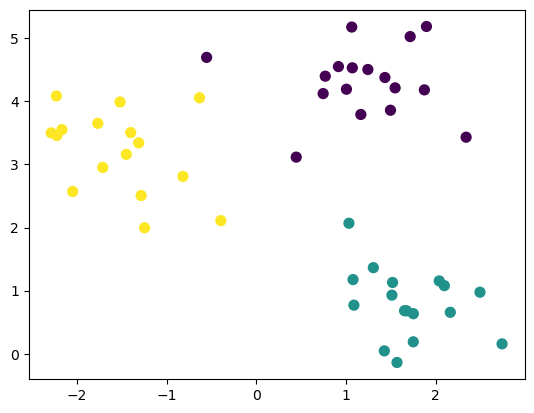

In [19]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=3,
                  random_state=0, cluster_std=.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50);

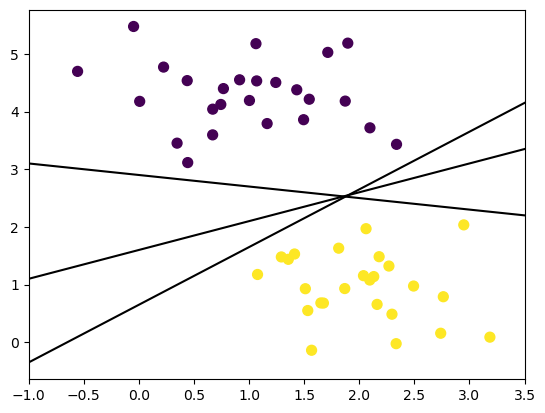

In [3]:
#Drawing some hyperplanes:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plt.plot([0.6], [2.1], color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

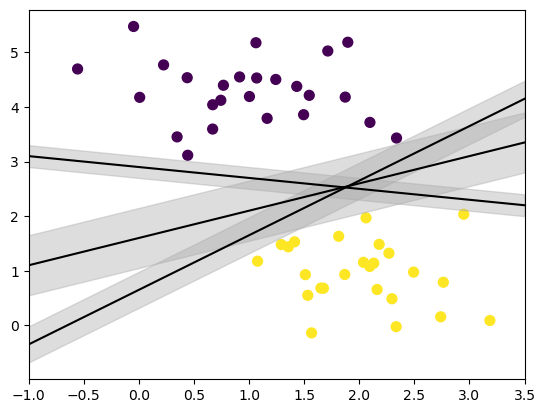

In [4]:
#Lets try to see the margin:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

In [13]:
#Lets build a SVM-C model to classify this data:
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X, y)

SVC(kernel='linear')

In [14]:
#Plotting:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


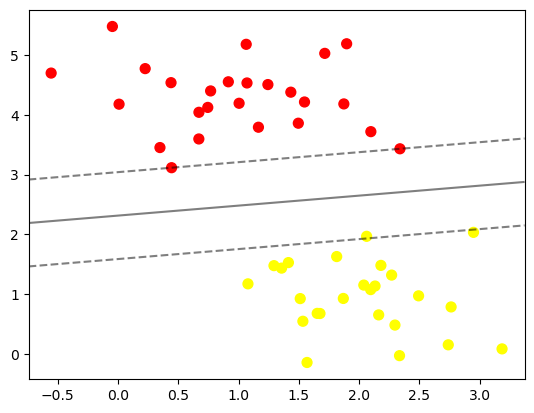

In [15]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

In [16]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In [17]:
print(model.coef_)
print(model.intercept_)

[[ 0.22967329 -1.37758262]]
[3.18971354]


In [1]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 3, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120, 180]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

NameError: name 'plt' is not defined

KERNEL SVM (Nonlinear SVM)

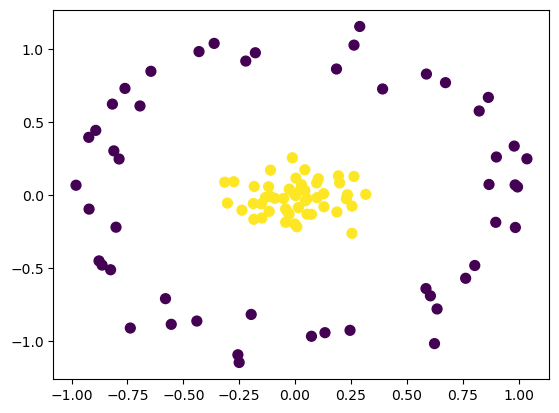

In [25]:
#Generating Data and linear SVM:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=0.1, noise=.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)

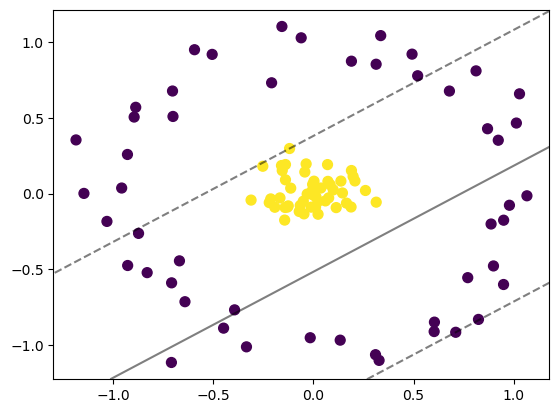

In [23]:
clf = SVC(kernel='linear').fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plot_svc_decision_function(clf, plot_support=False);

In [26]:
#Using RBF kernel:
r = np.exp(-(X ** 2).sum(1))

In [27]:
#In Scikit-Learn, we can apply kernelized SVM simply by changing our linear kernel 
#to an RBF (radial basis function) kernel, using the kernel model hyperparameter:
clf = SVC(kernel='rbf', C=100)
clf.fit(X, y)


SVC(C=100)

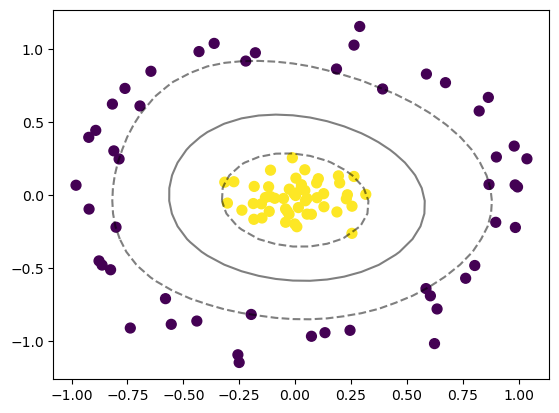

In [28]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

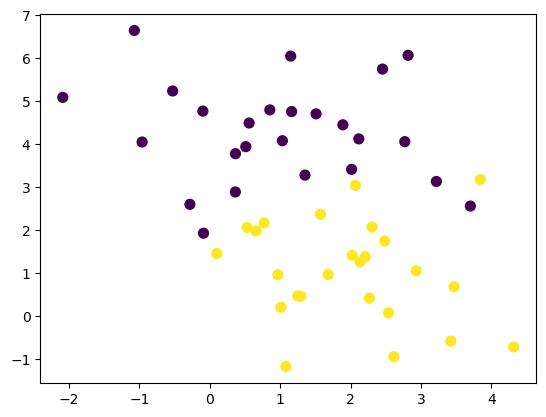

In [29]:
#Soft Margin:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=1.20)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50);

In [32]:
#Lets build a SVM-C model to classify this data:
from sklearn.svm import SVC 
model = SVC(kernel='linear', C=1000)
model.fit(X, y)

SVC(C=1000, kernel='linear')

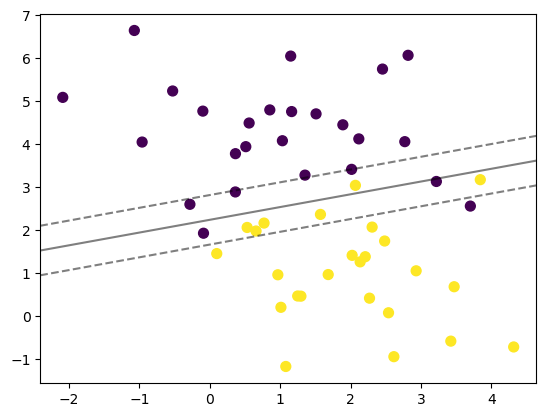

In [33]:
clf = SVC(kernel='linear').fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plot_svc_decision_function(clf, plot_support=False);